In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
import os
os.chdir(r'C:\Users\kshit\NNDL_project\Landslide')

In [3]:
path_single = r"C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2000.h5"
path_single_mask = r'C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2000.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Available keys in HDF5 file: ['img']
Input data shape: (128, 128, 14)
NDVI shape: (128, 128) Processed f_data shape: (1, 128, 128, 3)


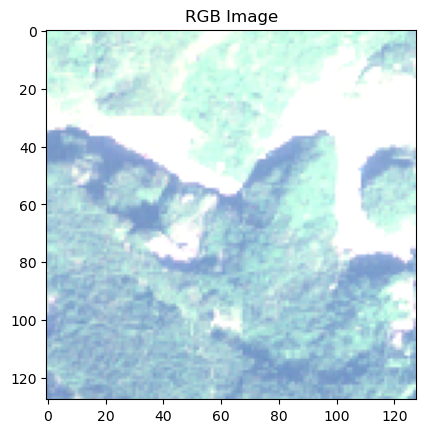

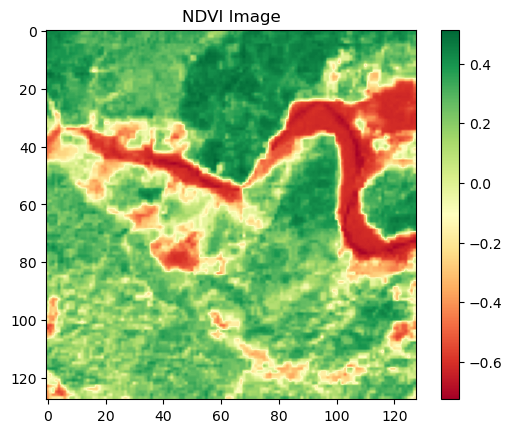

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def extract_band(data, index):
    """Extract a specific band from the dataset."""
    return data[:, :, index]

def calculate_ndvi(red_band, nir_band):
    """Compute NDVI from red and NIR bands."""
    return np.divide(nir_band - red_band, np.add(nir_band, red_band), where=(nir_band + red_band) != 0)

# Initialize empty array
f_data = np.zeros((1, 128, 128, 3))

# Load the HDF5 file
with h5py.File(path_single, 'r') as hdf:
    keys = list(hdf.keys())
    print("Available keys in HDF5 file:", keys)

    # Extract the dataset
    dataset = np.array(hdf['img'])
    print("Input data shape:", dataset.shape)

    # Extract relevant bands
    red_band = extract_band(dataset, 3)
    green_band = extract_band(dataset, 2)
    blue_band = extract_band(dataset, 1)
    nir_band = extract_band(dataset, 7)
    swir_band_1 = extract_band(dataset, 12)
    swir_band_2 = extract_band(dataset, 13)

    # RGB visualization
    rgb_image = dataset[:, :, 3:0:-1]
    plt.figure()
    plt.title("RGB Image")
    plt.imshow(rgb_image)

    # Compute NDVI
    ndvi = calculate_ndvi(red_band, nir_band)
    f_data[0, :, :, 0] = ndvi
    f_data[0, :, :, 1] = swir_band_1
    f_data[0, :, :, 2] = swir_band_2

    print("NDVI shape:", ndvi.shape, "Processed f_data shape:", f_data.shape)

    # NDVI visualization
    plt.figure()
    plt.title("NDVI Image")
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar()
    plt.show()


In [5]:
path_single = r"C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_10.h5"
path_single_mask = r'C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1.h5'
TRAIN_PATH = r"C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\*.h5"
TRAIN_MASK = r'C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [10]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1.h5
1 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_10.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_10.h5
2 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_100.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_100.h5
3 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1000.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1000.h5
4 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1001.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1001.h5
5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1002.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1002.h5
6 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1003.h5 C:\Users\kshit\NNDL_project\Landslid

58 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1050.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1050.h5
59 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1051.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1051.h5
60 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1052.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1052.h5
61 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1053.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1053.h5
62 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1054.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1054.h5
63 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1055.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1055.h5
64 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1056.h5 C:\Users\kshit\NN

119 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1105.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1105.h5
120 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1106.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1106.h5
121 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1107.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1107.h5
122 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1108.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1108.h5
123 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1109.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1109.h5
124 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_111.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_111.h5
125 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1110.h5 C:\Users\ksh

180 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1160.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1160.h5
181 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1161.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1161.h5
182 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1162.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1162.h5
183 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1163.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1163.h5
184 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1164.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1164.h5
185 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1165.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1165.h5
186 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1166.h5 C:\Users\k

241 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1215.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1215.h5
242 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1216.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1216.h5
243 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1217.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1217.h5
244 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1218.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1218.h5
245 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1219.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1219.h5
246 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_122.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_122.h5
247 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1220.h5 C:\Users\ksh

305 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1273.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1273.h5
306 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1274.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1274.h5
307 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1275.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1275.h5
308 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1276.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1276.h5
309 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1277.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1277.h5
310 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1278.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1278.h5
311 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1279.h5 C:\Users\k

367 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1329.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1329.h5
368 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_133.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_133.h5
369 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1330.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1330.h5
370 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1331.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1331.h5
371 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1332.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1332.h5
372 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1333.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1333.h5
373 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1334.h5 C:\Users\ksh

432 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1388.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1388.h5
433 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1389.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1389.h5
434 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_139.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_139.h5
435 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1390.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1390.h5
436 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1391.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1391.h5
437 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1392.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1392.h5
438 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1393.h5 C:\Users\ksh

499 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1448.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1448.h5
500 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1449.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1449.h5
501 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_145.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_145.h5
502 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1450.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1450.h5
503 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1451.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1451.h5
504 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1452.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1452.h5
505 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1453.h5 C:\Users\ksh

562 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1504.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1504.h5
563 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1505.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1505.h5
564 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1506.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1506.h5
565 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1507.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1507.h5
566 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1508.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1508.h5
567 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1509.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1509.h5
568 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_151.h5 C:\Users\ks

622 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1559.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1559.h5
623 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_156.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_156.h5
624 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1560.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1560.h5
625 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1561.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1561.h5
626 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1562.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1562.h5
627 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1563.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1563.h5
628 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1564.h5 C:\Users\ksh

682 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1612.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1612.h5
683 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1613.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1613.h5
684 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1614.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1614.h5
685 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1615.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1615.h5
686 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1616.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1616.h5
687 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1617.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1617.h5
688 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1618.h5 C:\Users\k

739 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1664.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1664.h5
740 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1665.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1665.h5
741 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1666.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1666.h5
742 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1667.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1667.h5
743 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1668.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1668.h5
744 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1669.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1669.h5
745 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_167.h5 C:\Users\ks

793 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1712.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1712.h5
794 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1713.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1713.h5
795 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1714.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1714.h5
796 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1715.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1715.h5
797 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1716.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1716.h5
798 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1717.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1717.h5
799 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1718.h5 C:\Users\k

847 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1761.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1761.h5
848 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1762.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1762.h5
849 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1763.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1763.h5
850 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1764.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1764.h5
851 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1765.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1765.h5
852 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1766.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1766.h5
853 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1767.h5 C:\Users\k

901 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_181.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_181.h5
902 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1810.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1810.h5
903 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1811.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1811.h5
904 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1812.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1812.h5
905 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1813.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1813.h5
906 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1814.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1814.h5
907 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1815.h5 C:\Users\ksh

1011 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1909.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1909.h5
1012 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_191.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_191.h5
1013 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1910.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1910.h5
1014 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1911.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1911.h5
1015 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1912.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1912.h5
1016 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1913.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1913.h5
1017 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1914.h5 C:\Us

1066 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1959.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1959.h5
1067 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_196.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_196.h5
1068 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1960.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1960.h5
1069 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1961.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1961.h5
1070 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1962.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1962.h5
1071 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1963.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_1963.h5
1072 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1964.h5 C:\Us

1157 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_204.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_204.h5
1158 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2040.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2040.h5
1159 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2041.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2041.h5
1160 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2042.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2042.h5
1161 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2043.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2043.h5
1162 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2044.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2044.h5
1163 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2045.h5 C:\Us

1239 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2113.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2113.h5
1240 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2114.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2114.h5
1241 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2115.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2115.h5
1242 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2116.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2116.h5
1243 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2117.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2117.h5
1244 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2118.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2118.h5
1245 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2119.h5 C:\

1333 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2199.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2199.h5
1334 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_22.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_22.h5
1335 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_220.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_220.h5
1336 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2200.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2200.h5
1337 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2201.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2201.h5
1338 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2202.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2202.h5
1339 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2203.h5 C:\Users\

1438 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2293.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2293.h5
1439 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2294.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2294.h5
1440 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2295.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2295.h5
1441 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2296.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2296.h5
1442 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2297.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2297.h5
1443 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2298.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2298.h5
1444 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2299.h5 C:\

1546 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2390.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2390.h5
1547 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2391.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2391.h5
1548 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2392.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2392.h5
1549 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2393.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2393.h5
1550 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2394.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2394.h5
1551 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2395.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2395.h5
1552 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2396.h5 C:\

1604 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2442.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2442.h5
1605 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2443.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2443.h5
1606 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2444.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2444.h5
1607 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2445.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2445.h5
1608 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2446.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2446.h5
1609 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2447.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2447.h5
1610 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2448.h5 C:\

1663 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2496.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2496.h5
1664 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2497.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2497.h5
1665 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2498.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2498.h5
1666 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2499.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2499.h5
1667 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_25.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_25.h5
1668 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_250.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_250.h5
1669 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2500.h5 C:\Users\

C:\Users\kshit\AppData\Local\Temp\ipykernel_18136\2015930227.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1710 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2538.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2538.h5
1711 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2539.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2539.h5
1712 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_254.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_254.h5
1713 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2540.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2540.h5
1714 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2541.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2541.h5
1715 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2542.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2542.h5
1716 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2543.h5 C:\Us

1816 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2633.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2633.h5
1817 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2634.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2634.h5
1818 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2635.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2635.h5
1819 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2636.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2636.h5
1820 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2637.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2637.h5
1821 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2638.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2638.h5
1822 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2639.h5 C:\

1874 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2686.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2686.h5
1875 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2687.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2687.h5
1876 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2688.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2688.h5
1877 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2689.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2689.h5
1878 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_269.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_269.h5
1879 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2690.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2690.h5
1880 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2691.h5 C:\Us

1933 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2739.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2739.h5
1934 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_274.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_274.h5
1935 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2740.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2740.h5
1936 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2741.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2741.h5
1937 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2742.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2742.h5
1938 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2743.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2743.h5
1939 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2744.h5 C:\Us

1994 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2794.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2794.h5
1995 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2795.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2795.h5
1996 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2796.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2796.h5
1997 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2797.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2797.h5
1998 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2798.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2798.h5
1999 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2799.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2799.h5
2000 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_28.h5 C:\Us

2060 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2853.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2853.h5
2061 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2854.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2854.h5
2062 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2855.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2855.h5
2063 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2856.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2856.h5
2064 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2857.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2857.h5
2065 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2858.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2858.h5
2066 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2859.h5 C:\

2122 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2909.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2909.h5
2123 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_291.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_291.h5
2124 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2910.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2910.h5
2125 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2911.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2911.h5
2126 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2912.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2912.h5
2127 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2913.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2913.h5
2128 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2914.h5 C:\Us

2183 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2964.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2964.h5
2184 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2965.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2965.h5
2185 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2966.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2966.h5
2186 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2967.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2967.h5
2187 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2968.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2968.h5
2188 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_2969.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_2969.h5
2189 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_297.h5 C:\U

2246 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_302.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_302.h5
2247 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3020.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3020.h5
2248 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3021.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3021.h5
2249 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3022.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3022.h5
2250 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3023.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3023.h5
2251 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3024.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3024.h5
2252 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3025.h5 C:\Us

C:\Users\kshit\AppData\Local\Temp\ipykernel_18136\2015930227.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2315 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3082.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3082.h5
2316 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3083.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3083.h5
2317 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3084.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3084.h5
2318 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3085.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3085.h5
2319 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3086.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3086.h5
2320 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3087.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3087.h5
2321 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3088.h5 C:\

2382 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3142.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3142.h5
2383 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3143.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3143.h5
2384 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3144.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3144.h5
2385 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3145.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3145.h5
2386 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3146.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3146.h5
2387 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3147.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3147.h5
2388 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3148.h5 C:\

2446 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_320.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_320.h5
2447 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3200.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3200.h5
2448 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3201.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3201.h5
2449 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3202.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3202.h5
2450 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3203.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3203.h5
2451 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3204.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3204.h5
2452 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3205.h5 C:\Us

2509 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3257.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3257.h5
2510 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3258.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3258.h5
2511 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3259.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3259.h5
2512 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_326.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_326.h5
2513 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3260.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3260.h5
2514 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3261.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3261.h5
2515 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3262.h5 C:\Us

2577 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3318.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3318.h5
2578 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3319.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3319.h5
2579 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_332.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_332.h5
2580 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3320.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3320.h5
2581 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3321.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3321.h5
2582 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3322.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3322.h5
2583 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3323.h5 C:\Us

2643 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3378.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3378.h5
2644 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3379.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3379.h5
2645 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_338.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_338.h5
2646 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3380.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3380.h5
2647 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3381.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3381.h5
2648 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3382.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3382.h5
2649 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3383.h5 C:\Us

2710 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3438.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3438.h5
2711 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3439.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3439.h5
2712 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_344.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_344.h5
2713 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3440.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3440.h5
2714 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3441.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3441.h5
2715 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3442.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3442.h5
2716 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3443.h5 C:\Us

2773 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3495.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3495.h5
2774 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3496.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3496.h5
2775 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3497.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3497.h5
2776 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3498.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3498.h5
2777 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3499.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3499.h5
2778 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_35.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_35.h5
2779 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_350.h5 C:\Users

2836 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3551.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3551.h5
2837 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3552.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3552.h5
2838 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3553.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3553.h5
2839 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3554.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3554.h5
2840 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3555.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3555.h5
2841 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3556.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3556.h5
2842 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3557.h5 C:\

2901 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_361.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_361.h5
2902 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3610.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3610.h5
2903 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3611.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3611.h5
2904 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3612.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3612.h5
2905 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3613.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3613.h5
2906 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3614.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3614.h5
2907 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3615.h5 C:\Us

2968 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3670.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3670.h5
2969 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3671.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3671.h5
2970 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3672.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3672.h5
2971 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3673.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3673.h5
2972 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3674.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3674.h5
2973 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3675.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3675.h5
2974 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3676.h5 C:\

3035 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3730.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3730.h5
3036 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3731.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3731.h5
3037 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3732.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3732.h5
3038 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3733.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3733.h5
3039 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3734.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3734.h5
3040 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3735.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3735.h5
3041 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3736.h5 C:\

3100 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_379.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_379.h5
3101 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3790.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3790.h5
3102 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3791.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3791.h5
3103 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3792.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3792.h5
3104 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3793.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3793.h5
3105 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3794.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_3794.h5
3106 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_3795.h5 C:\Us

3162 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_425.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_425.h5
3163 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_426.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_426.h5
3164 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_427.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_427.h5
3165 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_428.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_428.h5
3166 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_429.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_429.h5
3167 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_43.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_43.h5
3168 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_430.h5 C:\Users\kshit\NND

3223 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_480.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_480.h5
3224 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_481.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_481.h5
3225 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_482.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_482.h5
3226 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_483.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_483.h5
3227 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_484.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_484.h5
3228 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_485.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_485.h5
3229 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_486.h5 C:\Users\kshit\N

3279 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_530.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_530.h5
3280 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_531.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_531.h5
3281 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_532.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_532.h5
3282 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_533.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_533.h5
3283 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_534.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_534.h5
3284 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_535.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_535.h5
3285 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_536.h5 C:\Users\kshit\N

3389 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_63.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_63.h5
3390 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_630.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_630.h5
3391 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_631.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_631.h5
3392 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_632.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_632.h5
3393 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_633.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_633.h5
3394 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_634.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_634.h5
3395 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_635.h5 C:\Users\kshit\NND

3446 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_681.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_681.h5
3447 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_682.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_682.h5
3448 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_683.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_683.h5
3449 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_684.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_684.h5
3450 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_685.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_685.h5
3451 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_686.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_686.h5
3452 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_687.h5 C:\Users\kshit\N

3503 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_732.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_732.h5
3504 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_733.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_733.h5
3505 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_734.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_734.h5
3506 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_735.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_735.h5
3507 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_736.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_736.h5
3508 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_737.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_737.h5
3509 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_738.h5 C:\Users\kshit\N

3602 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_821.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_821.h5
3603 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_822.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_822.h5
3604 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_823.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_823.h5
3605 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_824.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_824.h5
3606 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_825.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_825.h5
3607 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_826.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_826.h5
3608 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_827.h5 C:\Users\kshit\N

3708 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_917.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_917.h5
3709 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_918.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_918.h5
3710 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_919.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_919.h5
3711 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_92.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_92.h5
3712 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_920.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_920.h5
3713 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_921.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_921.h5
3714 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_922.h5 C:\Users\kshit\NND

3766 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_97.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_97.h5
3767 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_970.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_970.h5
3768 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_971.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_971.h5
3769 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_972.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_972.h5
3770 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_973.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_973.h5
3771 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_974.h5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\mask\mask_974.h5
3772 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_975.h5 C:\Users\kshit\NND

In [11]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [12]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


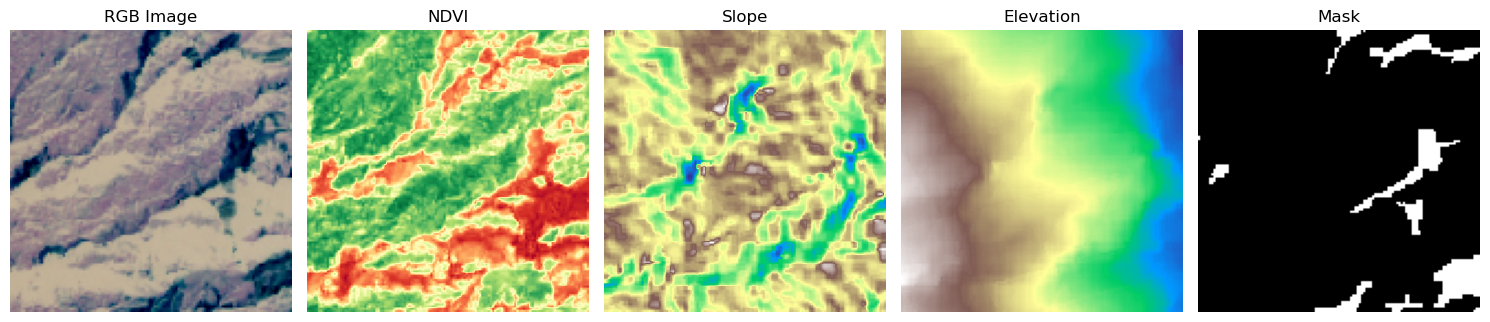

In [13]:
def plot_data(img_index, train_data, mask_data):
    fig, axes = plt.subplots(1, 5, figsize=(15, 10))
    titles = ["RGB Image", "NDVI", "Slope", "Elevation", "Mask"]
    data_to_plot = [
        train_data[img_index, :, :, 0:3],  # RGB
        train_data[img_index, :, :, 3],    # NDVI
        train_data[img_index, :, :, 4],    # Slope
        train_data[img_index, :, :, 5],    # Elevation
        mask_data[img_index, :, :, 0],     # Mask
    ]
    color_maps = [None, "RdYlGn", "terrain", "terrain", "gray"]

    for ax, title, data, cmap in zip(axes, titles, data_to_plot, color_maps):
        ax.set_title(title)
        ax.imshow(data, cmap=cmap)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
img = 234
plot_data(img, TRAIN_XX, TRAIN_YY)


In [14]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


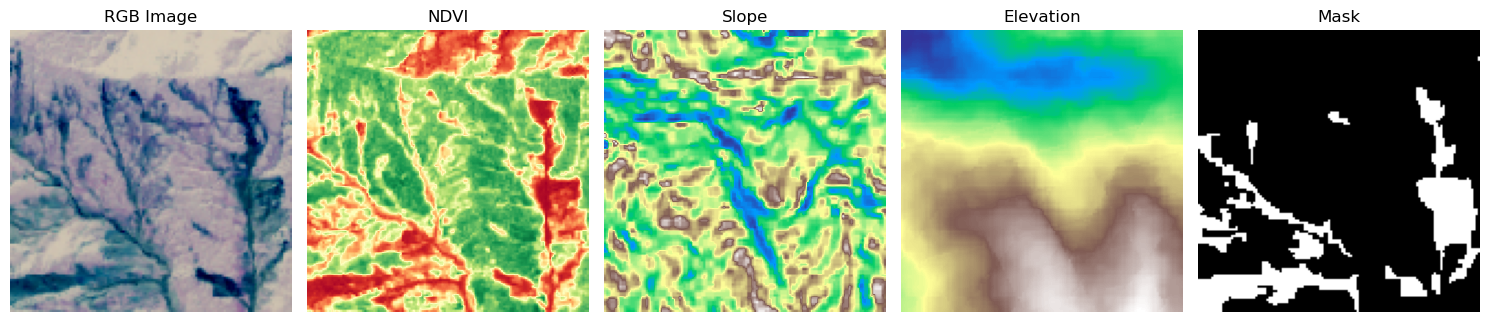

In [18]:
def plot_sample_data(img_index, x_data, y_data):
    # Titles for subplots
    titles = ["RGB Image", "NDVI", "Slope", "Elevation", "Mask"]
    
    # Data to be visualized in subplots
    data_to_plot = [
        x_data[img_index, :, :, 0:3],  # RGB
        x_data[img_index, :, :, 3],    # NDVI
        x_data[img_index, :, :, 4],    # Slope
        x_data[img_index, :, :, 5],    # Elevation
        y_data[img_index, :, :, 0],    # Mask
    ]
    
    # Colormap for each subplot
    colormaps = [None, "RdYlGn", "terrain", "terrain", "gray"]
    
    # Create subplots
    fig, axes = plt.subplots(1, 5, figsize=(15, 10))
    
    for ax, title, data, cmap in zip(axes, titles, data_to_plot, colormaps):
        ax.set_title(title)
        ax.imshow(data, cmap=cmap)
        ax.axis('off')  # Turn off axis for better visuals
    
    plt.tight_layout()
    plt.show()

# Example usage
img = 470
plot_sample_data(img, x_train, y_train)


In [19]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [20]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


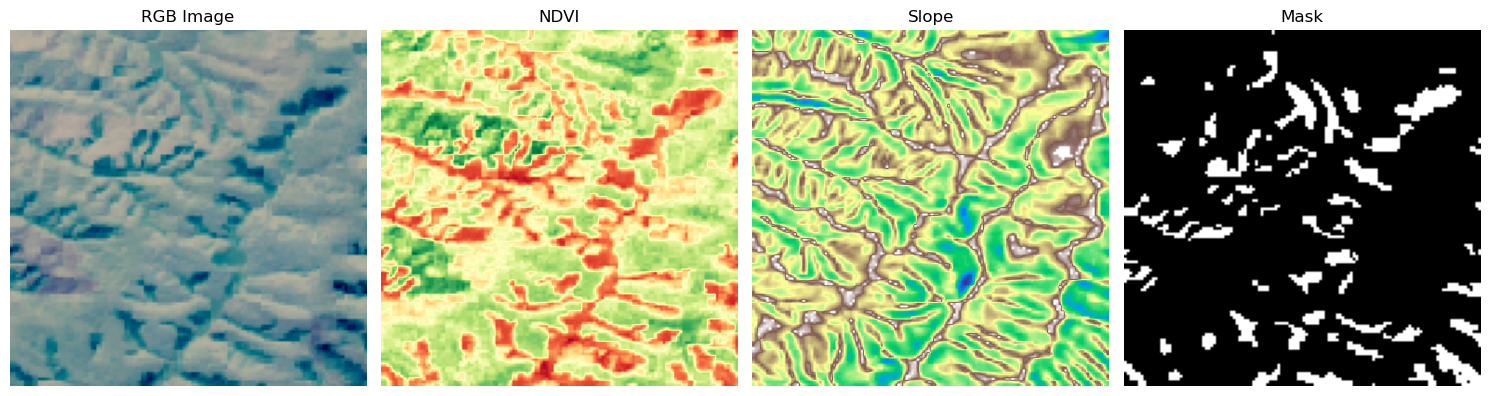

In [24]:
def plot_sample_features(img_index, x_data, y_data):
    titles = ["RGB Image", "NDVI", "Slope", "Mask"]
    data_to_plot = [
        x_data[img_index, :, :, 0:3],  # RGB
        x_data[img_index, :, :, 3],    # NDVI
        x_data[img_index, :, :, 4],    # Slope
        y_data[img_index, :, :, 0],    # Mask
    ]
    colormaps = [None, "RdYlGn", "terrain", "gray"]  # Color maps for each feature

    # Create subplots
    fig, axes = plt.subplots(1, 4, figsize=(15, 10))
    
    for ax, title, data, cmap in zip(axes, titles, data_to_plot, colormaps):
        ax.set_title(title)
        ax.imshow(data, cmap=cmap)
        ax.axis('off')  # Turn off axes for a clean look
    
    plt.tight_layout()
    plt.show()

# Example usage
img = 270
plot_sample_features(img, x_train, y_train)


In [25]:
import tensorflow as tf
from utils import recall_m, precision_m, f1_m  # Custom metrics

def build_unet_model(img_width, img_height, img_channels):
    inputs = tf.keras.layers.Input(shape=(img_width, img_height, img_channels))

    # Contraction path (encoder)
    def conv_block(x, filters, dropout_rate=0.1):
        x = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
        return x

    def encoder_block(x, filters, dropout_rate=0.1):
        c = conv_block(x, filters, dropout_rate)
        p = tf.keras.layers.MaxPooling2D((2, 2))(c)
        return c, p

    c1, p1 = encoder_block(inputs, 16, 0.1)
    c2, p2 = encoder_block(p1, 32, 0.1)
    c3, p3 = encoder_block(p2, 64, 0.2)
    c4, p4 = encoder_block(p3, 128, 0.2)

    # Bottleneck
    c5 = conv_block(p4, 256, 0.3)

    # Expansive path (decoder)
    def decoder_block(x, skip_connection, filters, dropout_rate=0.1):
        x = tf.keras.layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(x)
        x = tf.keras.layers.concatenate([x, skip_connection])
        x = conv_block(x, filters, dropout_rate)
        return x

    c6 = decoder_block(c5, c4, 128, 0.2)
    c7 = decoder_block(c6, c3, 64, 0.2)
    c8 = decoder_block(c7, c2, 32, 0.1)
    c9 = decoder_block(c8, c1, 16, 0.1)

    # Output layer
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    # Compile the model
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', f1_m, precision_m, recall_m])

    return model


In [26]:
# Build the U-Net model
model = build_unet_model(128, 128, 6)

# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras", 
        monitor="val_f1_m", 
        verbose=1, 
        save_best_only=True, 
        mode="max"
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_f1_m', 
        patience=5, 
        verbose=1, 
        mode='max', 
        restore_best_weights=True
    )
]

# Train the model
history = model.fit(
    x_train, 
    y_train, 
    batch_size=16,  
    epochs=100, 
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

# Save the final model
model.save("final_model.h5")

# Optional: Save the training history for later analysis
import json
with open("training_history.json", "w") as f:
    json.dump(history.history, f)


Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.63316, saving model to best_model.keras
190/190 - 57s - 298ms/step - accuracy: 0.9748 - f1_m: 0.2231 - loss: 0.0715 - precision_m: 0.4886 - recall_m: 0.1867 - val_accuracy: 0.9849 - val_f1_m: 0.6332 - val_loss: 0.0399 - val_precision_m: 0.6676 - val_recall_m: 0.6141
Epoch 2/100

Epoch 2: val_f1_m improved from 0.63316 to 0.66150, saving model to best_model.keras
190/190 - 53s - 277ms/step - accuracy: 0.9843 - f1_m: 0.5816 - loss: 0.0427 - precision_m: 0.7384 - recall_m: 0.5026 - val_accuracy: 0.9869 - val_f1_m: 0.6615 - val_loss: 0.0337 - val_precision_m: 0.7444 - val_recall_m: 0.6043
Epoch 3/100

Epoch 3: val_f1_m improved from 0.66150 to 0.67315, saving model to best_model.keras
190/190 - 49s - 256ms/step - accuracy: 0.9856 - f1_m: 0.6166 - loss: 0.0381 - precision_m: 0.7623 - recall_m: 0.5342 - val_accuracy: 0.9858 - val_f1_m: 0.6731 - val_loss: 0.0400 - val_precision_m: 0.6630 - val_recall_m: 0.6958
Epoch 4/100

Epoch 4: val_f1

In [27]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.029614847153425217 0.9883680939674377 0.7181081771850586 0.7582831978797913 0.6836330890655518


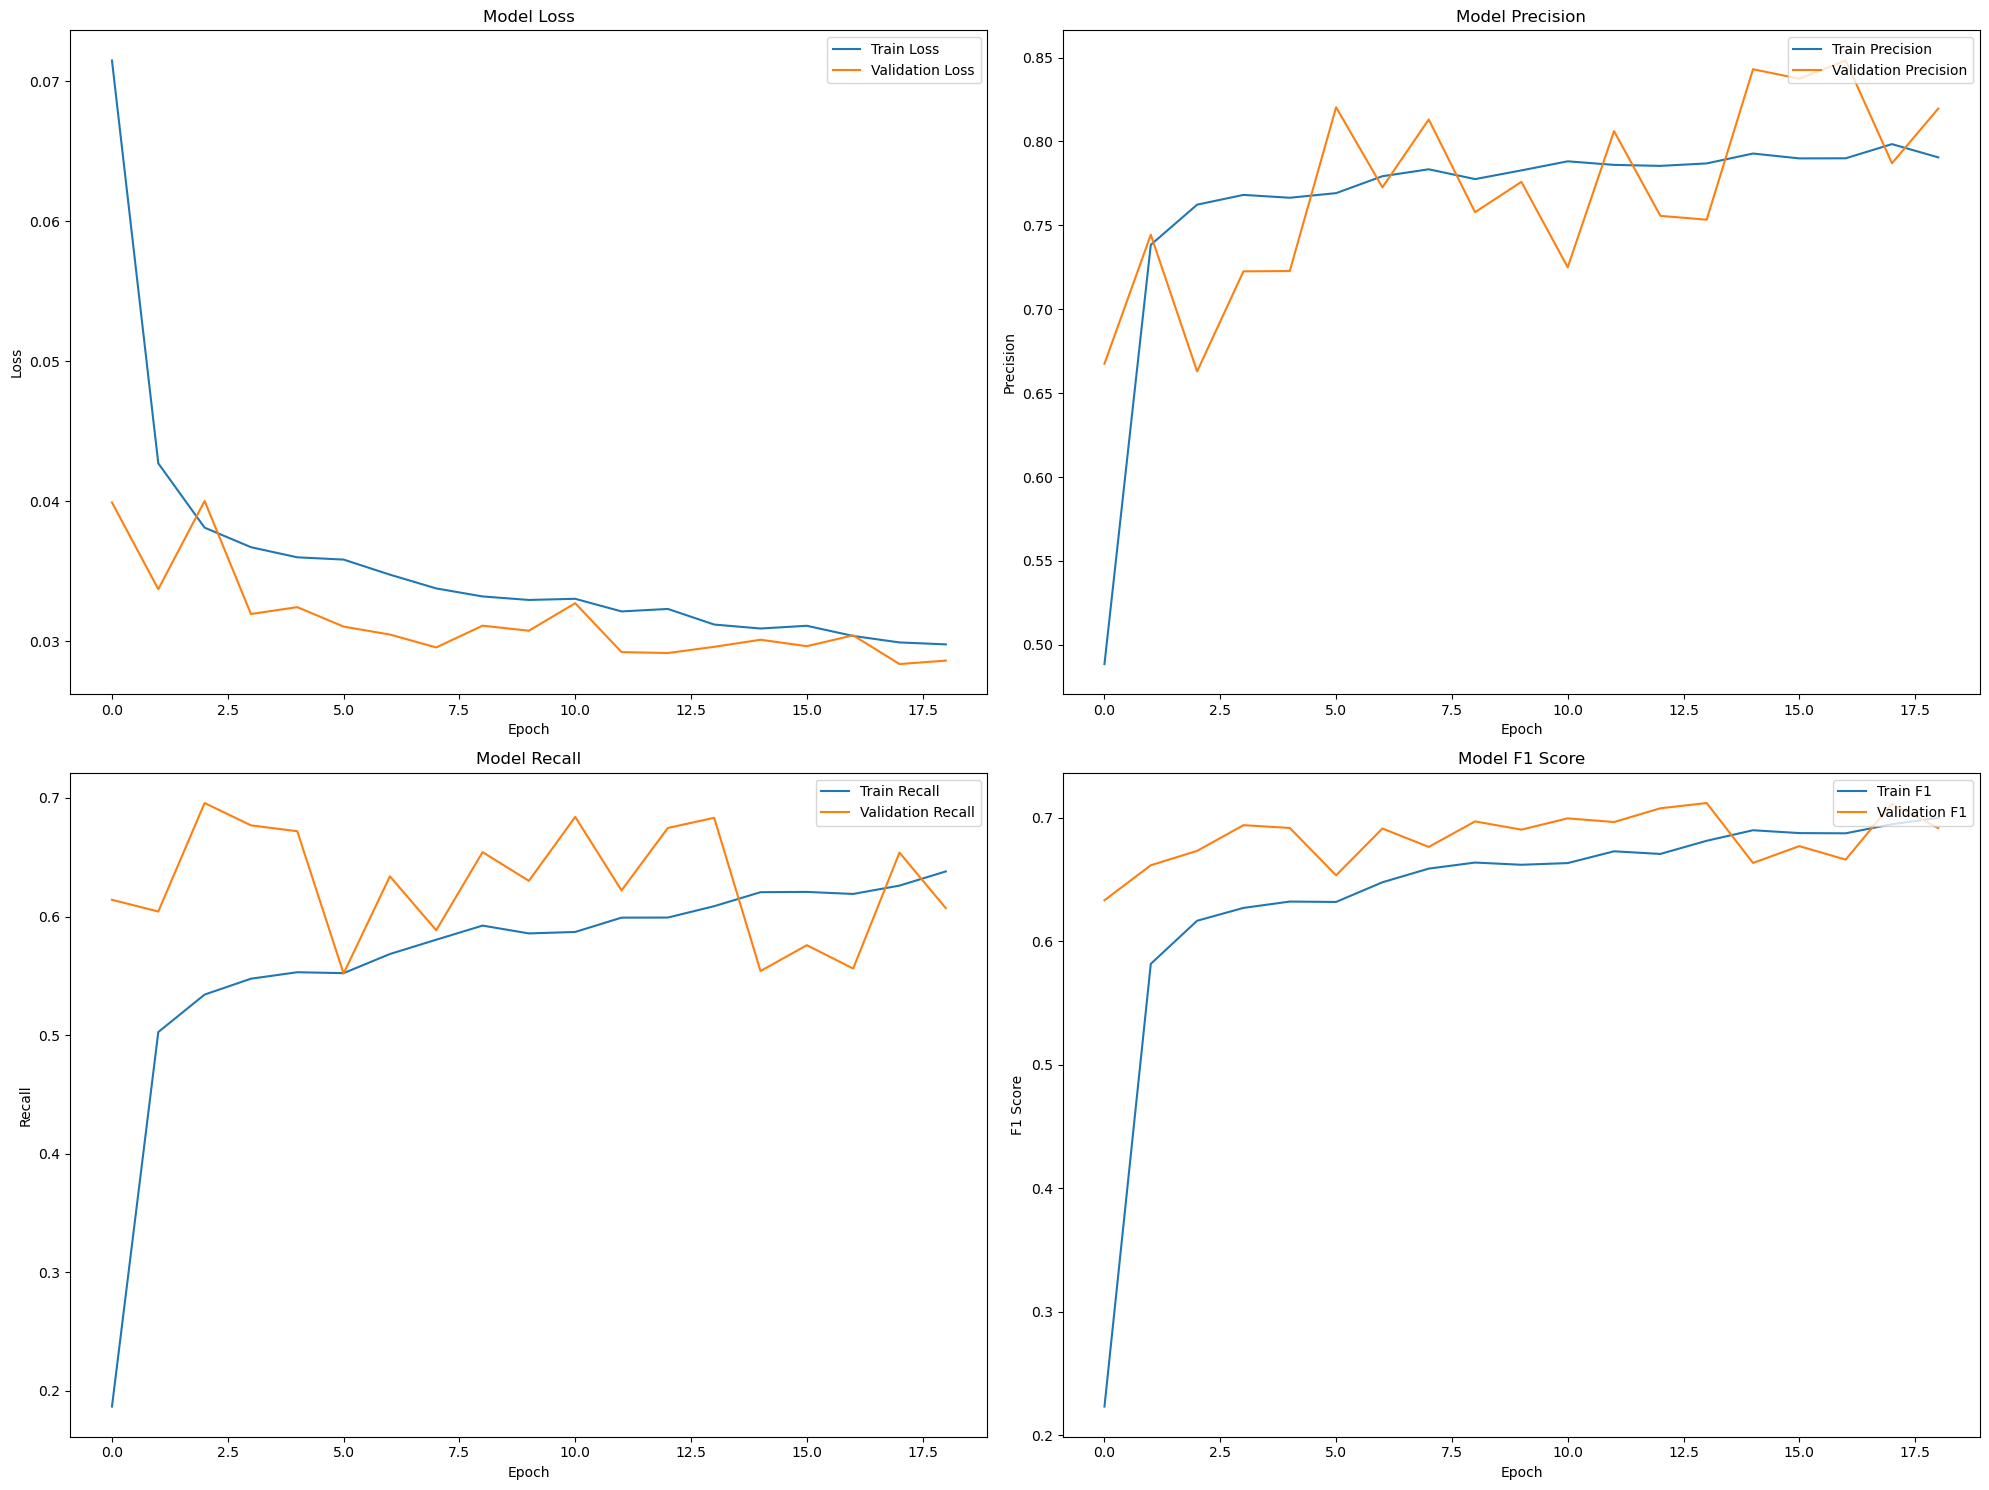

In [28]:
def plot_training_history(history):
    # Create subplots
    fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))

    # Plot Loss
    ax11.plot(history.history['loss'], label='Train Loss')
    ax11.plot(history.history['val_loss'], label='Validation Loss')
    ax11.set_title('Model Loss')
    ax11.set_xlabel('Epoch')
    ax11.set_ylabel('Loss')
    ax11.legend(loc='upper right')

    # Plot Precision
    ax12.plot(history.history['precision_m'], label='Train Precision')
    ax12.plot(history.history['val_precision_m'], label='Validation Precision')
    ax12.set_title('Model Precision')
    ax12.set_xlabel('Epoch')
    ax12.set_ylabel('Precision')
    ax12.legend(loc='upper right')

    # Plot Recall
    ax13.plot(history.history['recall_m'], label='Train Recall')
    ax13.plot(history.history['val_recall_m'], label='Validation Recall')
    ax13.set_title('Model Recall')
    ax13.set_xlabel('Epoch')
    ax13.set_ylabel('Recall')
    ax13.legend(loc='upper right')

    # Plot F1 Score
    ax14.plot(history.history['f1_m'], label='Train F1')
    ax14.plot(history.history['val_f1_m'], label='Validation F1')
    ax14.set_title('Model F1 Score')
    ax14.set_xlabel('Epoch')
    ax14.set_ylabel('F1 Score')
    ax14.legend(loc='upper right')

    # Layout adjustment
    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [29]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step


In [30]:
validation_url = r'C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1.h5
1 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_10.h5
2 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_100.h5
3 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1000.h5
4 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1001.h5
5 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1002.h5
6 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1003.h5
7 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1004.h5
8 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1005.h5
9 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1006.h5
10 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1007.h5
11 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1008.h5
12 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1009.h5
13 C:\Users\ksh

122 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1108.h5
123 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1109.h5
124 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_111.h5
125 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1110.h5
126 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1111.h5
127 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1112.h5
128 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1113.h5
129 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1114.h5
130 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1115.h5
131 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1116.h5
132 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1117.h5
133 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1118.h5
134 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\i

229 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1204.h5
230 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1205.h5
231 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1206.h5
232 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1207.h5
233 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1208.h5
234 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1209.h5
235 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_121.h5
236 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1210.h5
237 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1211.h5
238 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1212.h5
239 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1213.h5
240 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\image_1214.h5
241 C:\Users\kshit\NNDL_project\Landslide\archive\TrainData\img\i

IndexError: index 245 is out of bounds for axis 0 with size 245

In [31]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


(245, 128, 128, 1)

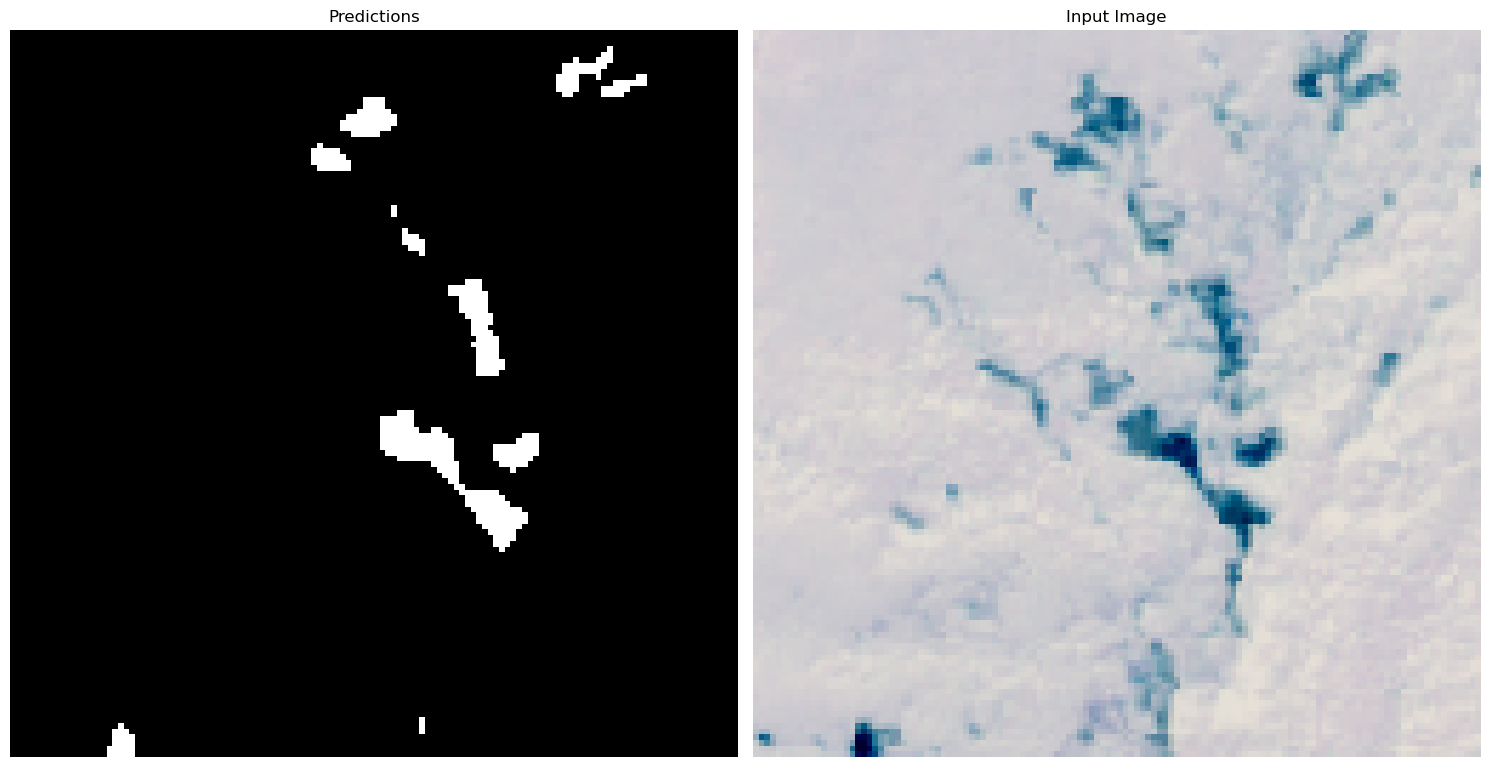

In [32]:
def visualize_prediction_and_input(img_index, VAL_XX, pred_img):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

    # Display predictions
    ax1.imshow(pred_img[img_index, :, :, 0], cmap='gray')
    ax1.set_title("Predictions")
    ax1.axis('off')

    # Display input image
    ax2.imshow(VAL_XX[img_index, :, :, 0:3])
    ax2.set_title("Input Image")
    ax2.axis('off')

    # Layout adjustment
    plt.tight_layout()
    plt.show()

# Example usage
visualize_prediction_and_input(img_index=150, VAL_XX=VAL_XX, pred_img=pred_img)
